In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/train.csv')

In [3]:
df.drop('id',axis=1,inplace=True)

Text(0.5, 1.0, 'Delay Time')

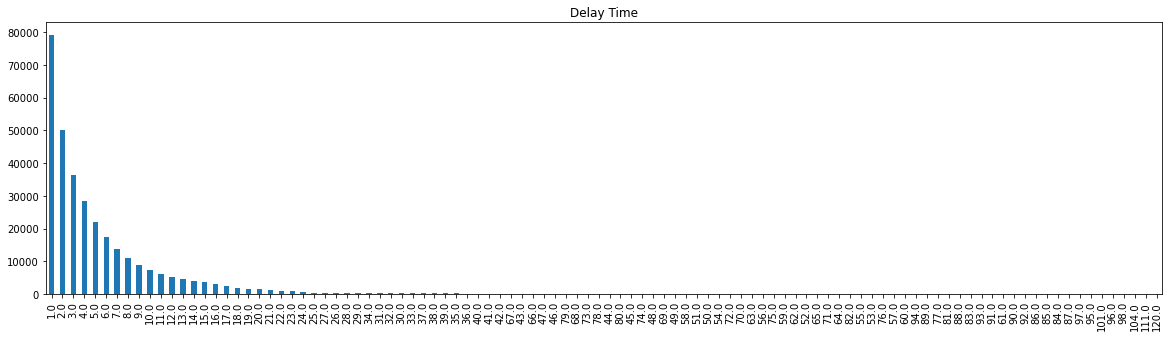

In [4]:
ax=plt.subplots(figsize=(20,5))
df.delayTime.value_counts()[1:].plot(kind='bar')
plt.title('Delay Time')

Text(0.5, 1.0, 'Line name')

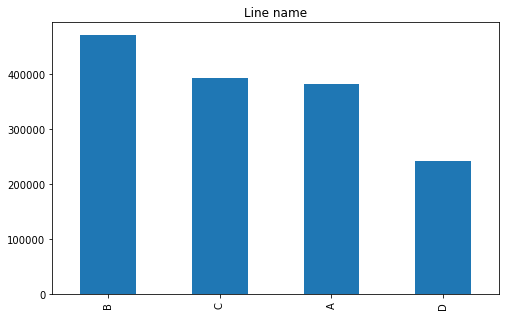

In [5]:
ax=plt.subplots(figsize=(8,5))
df.lineName.value_counts().plot(kind='bar')
plt.title('Line name')

Text(0.5, 1.0, 'date')

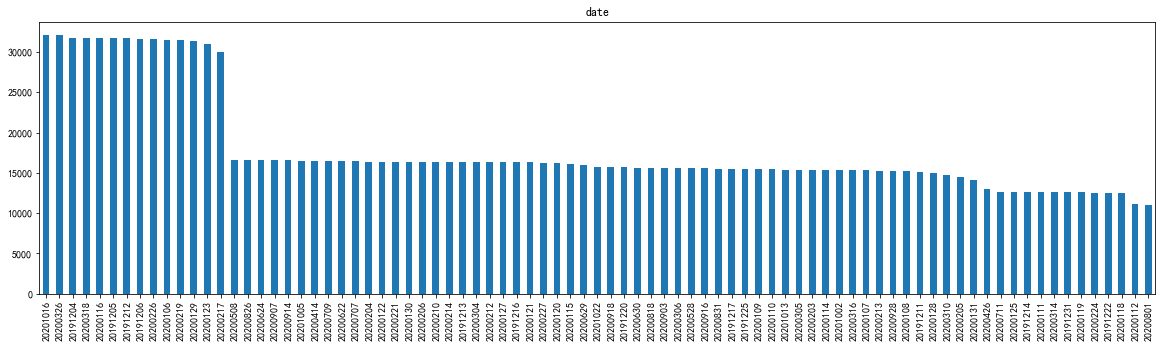

In [24]:
ax=plt.subplots(figsize=(20,5))
df.date.value_counts().plot(kind='bar')
plt.title('date')

Text(0.5, 1.0, 'directionCode')

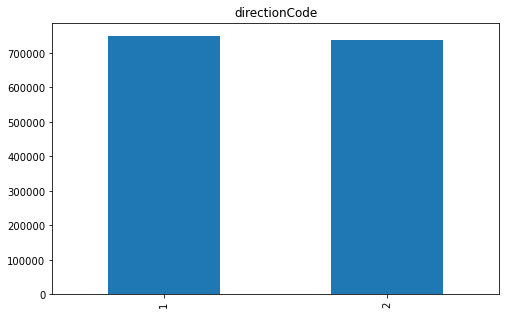

In [6]:
ax=plt.subplots(figsize=(8,5))
df.directionCode.value_counts().plot(kind='bar')
plt.title('directionCode')

([], [])

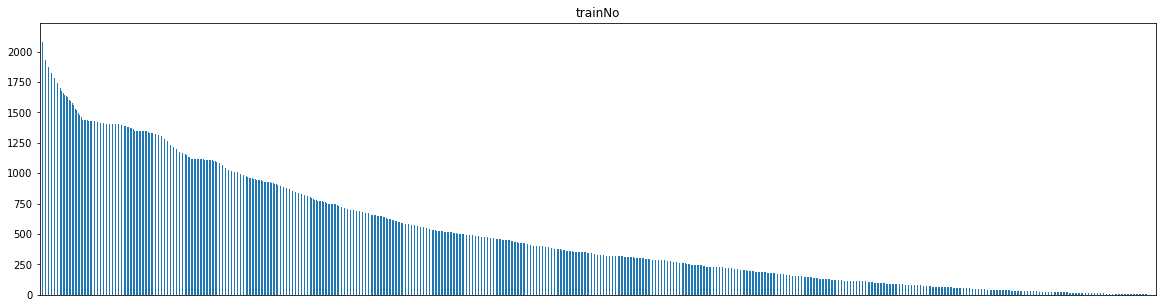

In [7]:
ax=plt.subplots(figsize=(20,5))
df.trainNo.value_counts().plot(kind='bar')
plt.title('trainNo')
plt.xticks([])

([], [])

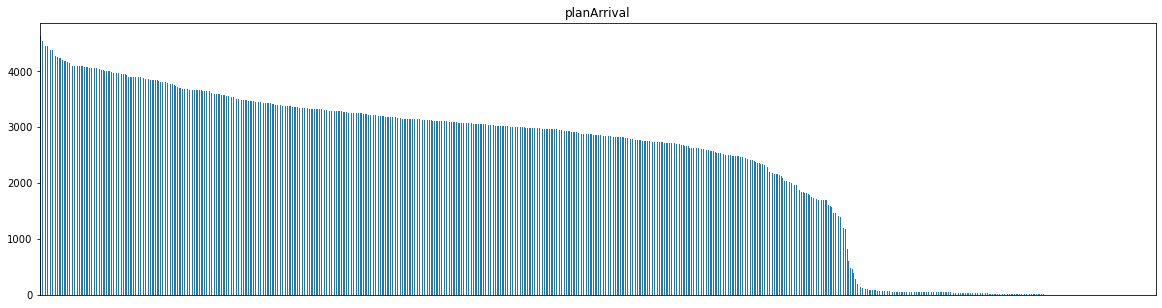

In [8]:
ax=plt.subplots(figsize=(20,5))
df.planArrival.value_counts().plot(kind='bar')
plt.title('planArrival')
plt.xticks([])

In [9]:
network=pd.read_csv('data/network.csv')

In [10]:
network

,network_id,station1,station2
0,1,vpGT,Femc
1,2,Femc,dJlm
2,3,dJlm,jebQ
3,4,jebQ,PsTo
4,5,PsTo,mxQg
...,...,...,...
109,110,BCRD,AVjc
110,111,AVjc,uYlv
111,112,uYlv,wwYD
112,113,wwYD,mkGW


In [11]:
import networkx as nx

In [12]:
G=nx.Graph()

In [13]:
total_station=list(set(list(network.station1.value_counts().index)+list(network.station2.value_counts().index)))
index=[x for x in np.arange(len(total_station))]
dicts=dict(zip(total_station,index))

In [14]:
for j in range(len(total_station)):
    G.add_node(j,desc=total_station[j])

In [15]:
for name,rows in network.iterrows():
    i,j=dicts[rows[1]],dicts[rows[2]]
    G.add_edge(i,j)

Text(0.5, 1.0, 'Station')

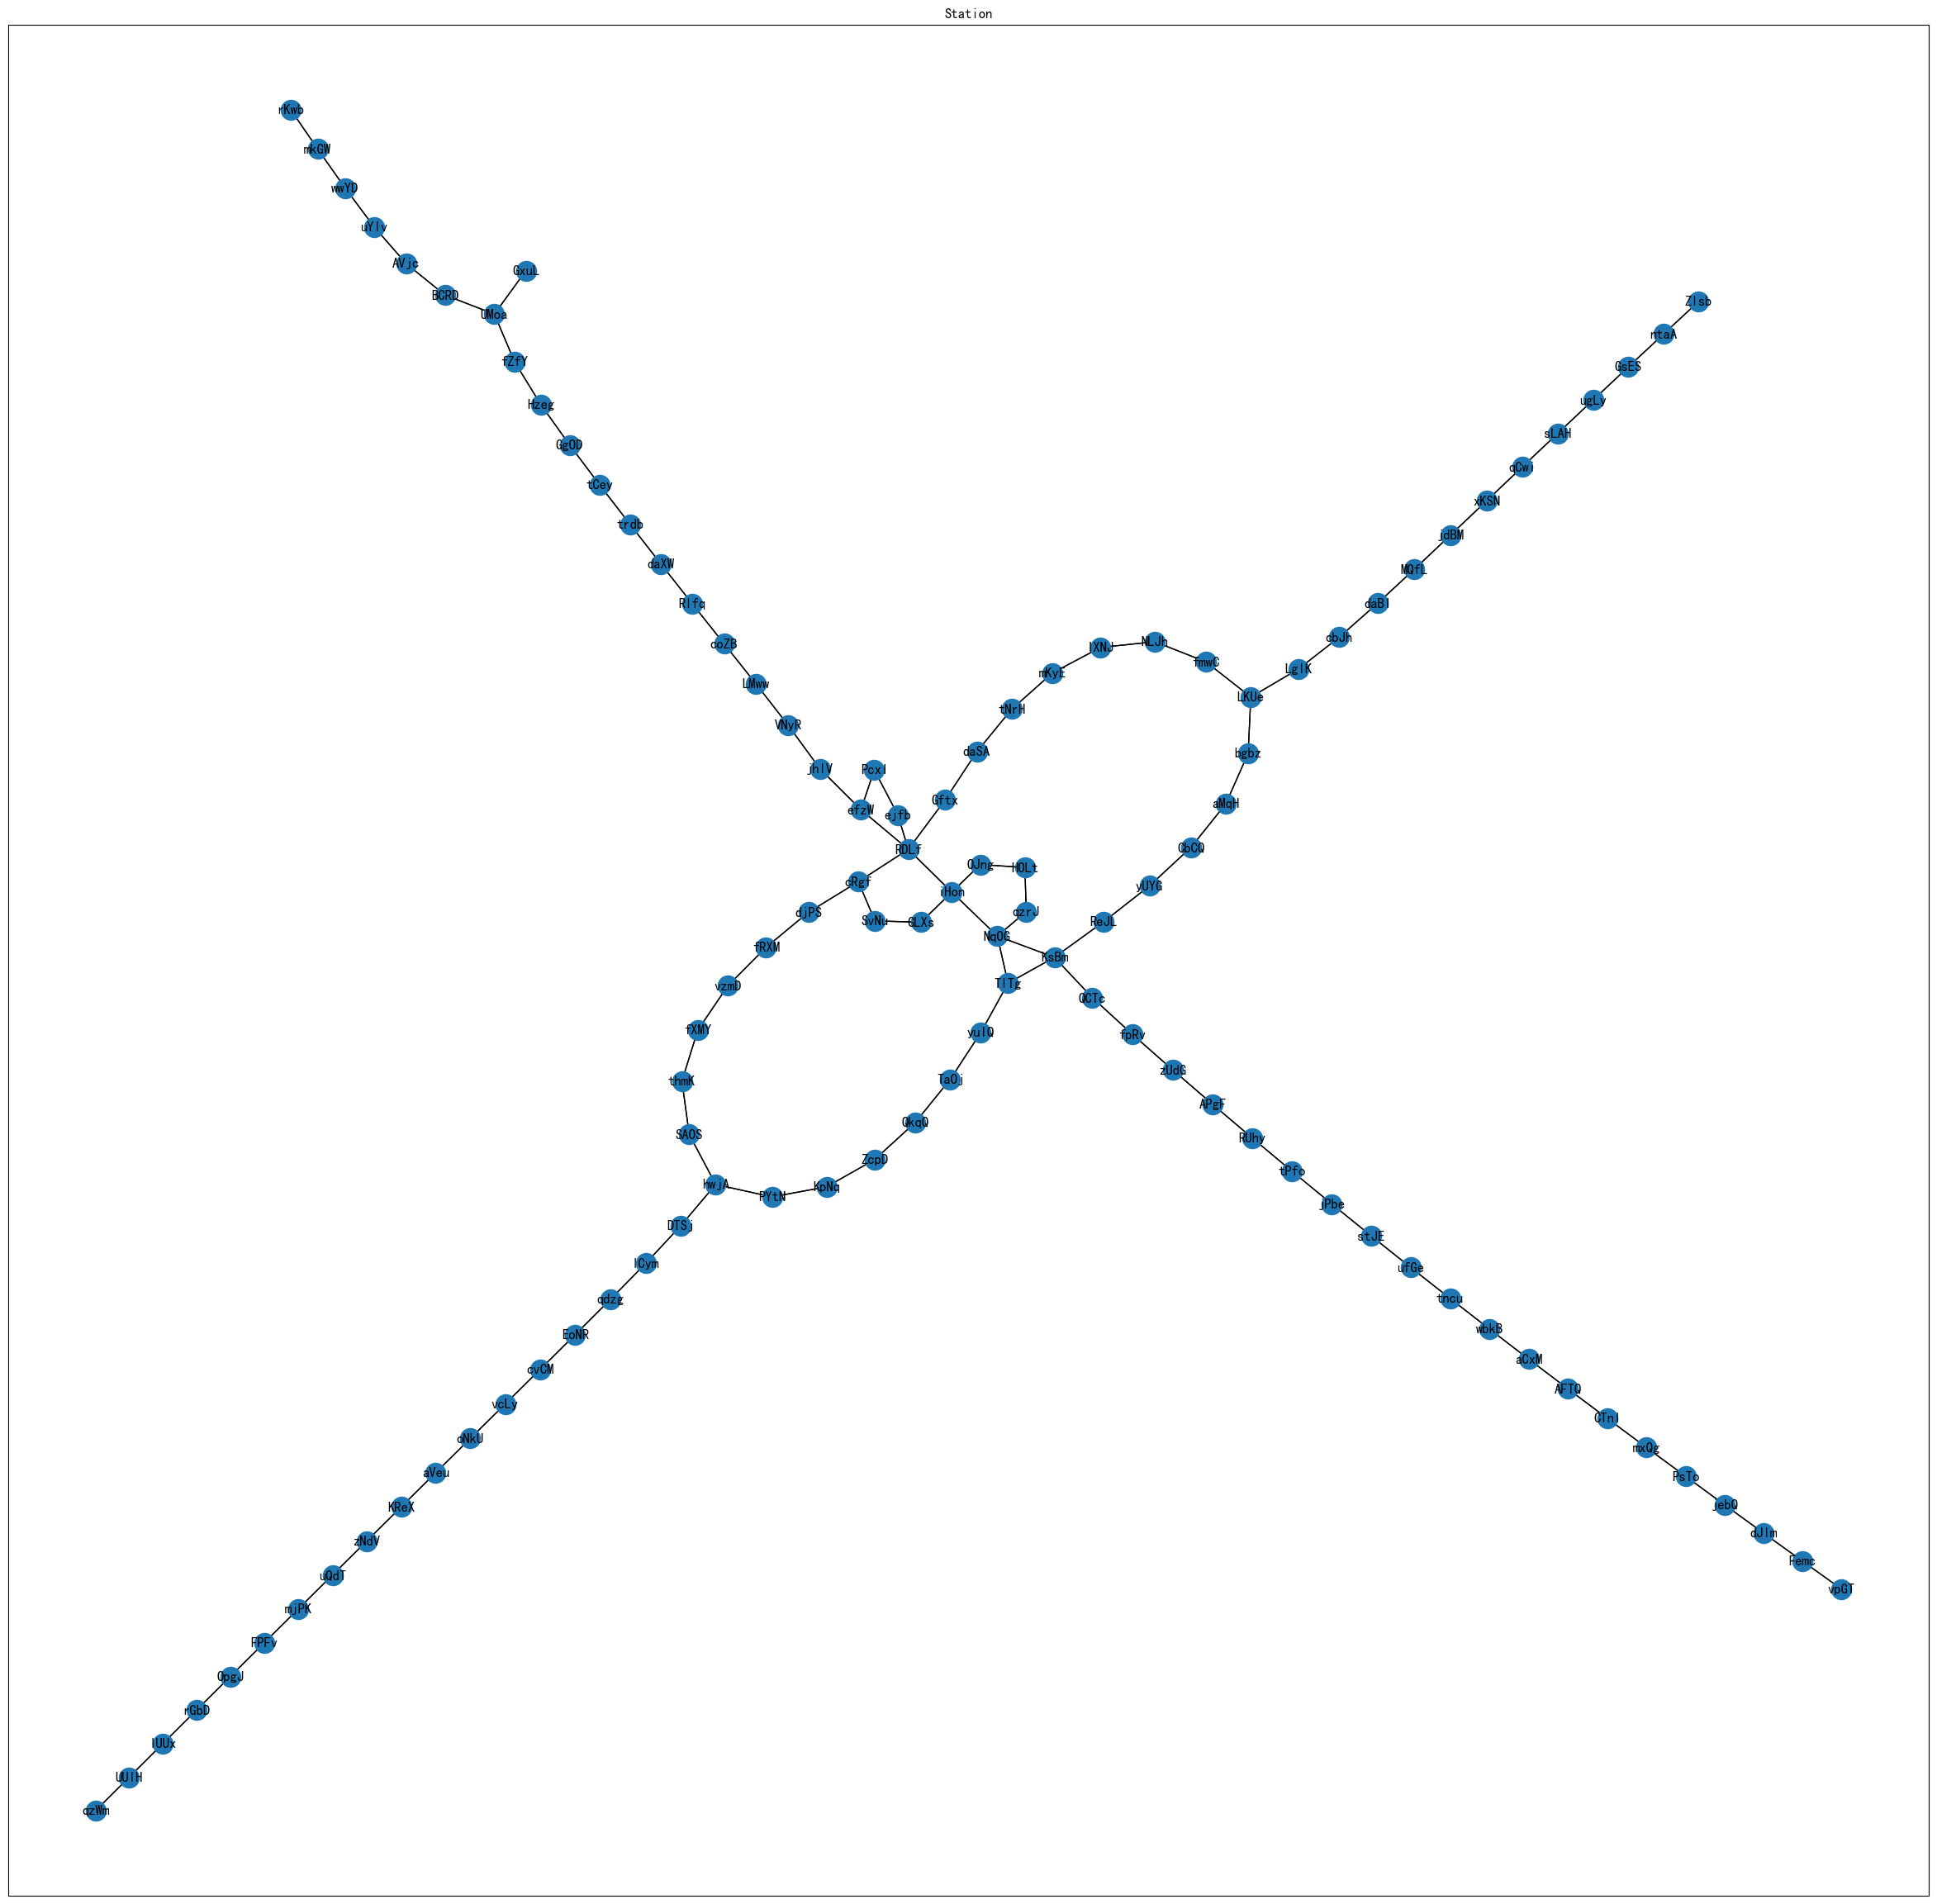

In [69]:
plt.subplots(figsize=(30,30), dpi=100)
pos=nx.kamada_kawai_layout(G)
pos = {k: [(v[0] if v[1]>0 else -v[0]), -v[1]] for k, v in pos.items()}  # 再計算結果がそれっぽくなるように手動で補正
pos = nx.kamada_kawai_layout(G, pos=pos)  # 描画位置の再計算
nx.draw_networkx(G,pos=pos, arrows=False)
plt.title('Station')

In [25]:
G = nx.DiGraph()
for st1, st2 in zip(network['station1'], network['station2']):
    G.add_edges_from([(st1, st2)])
    G.add_edges_from([(st2, st1)])
pos = nx.kamada_kawai_layout(G)  # 各駅の描画位置の初期値
pos = {k: [(v[0] if v[1]>0 else -v[0]), -v[1]] for k, v in pos.items()}  # 再計算結果がそれっぽくなるように手動で補正
pos = nx.kamada_kawai_layout(G, pos=pos)  # 描画位置の再計算

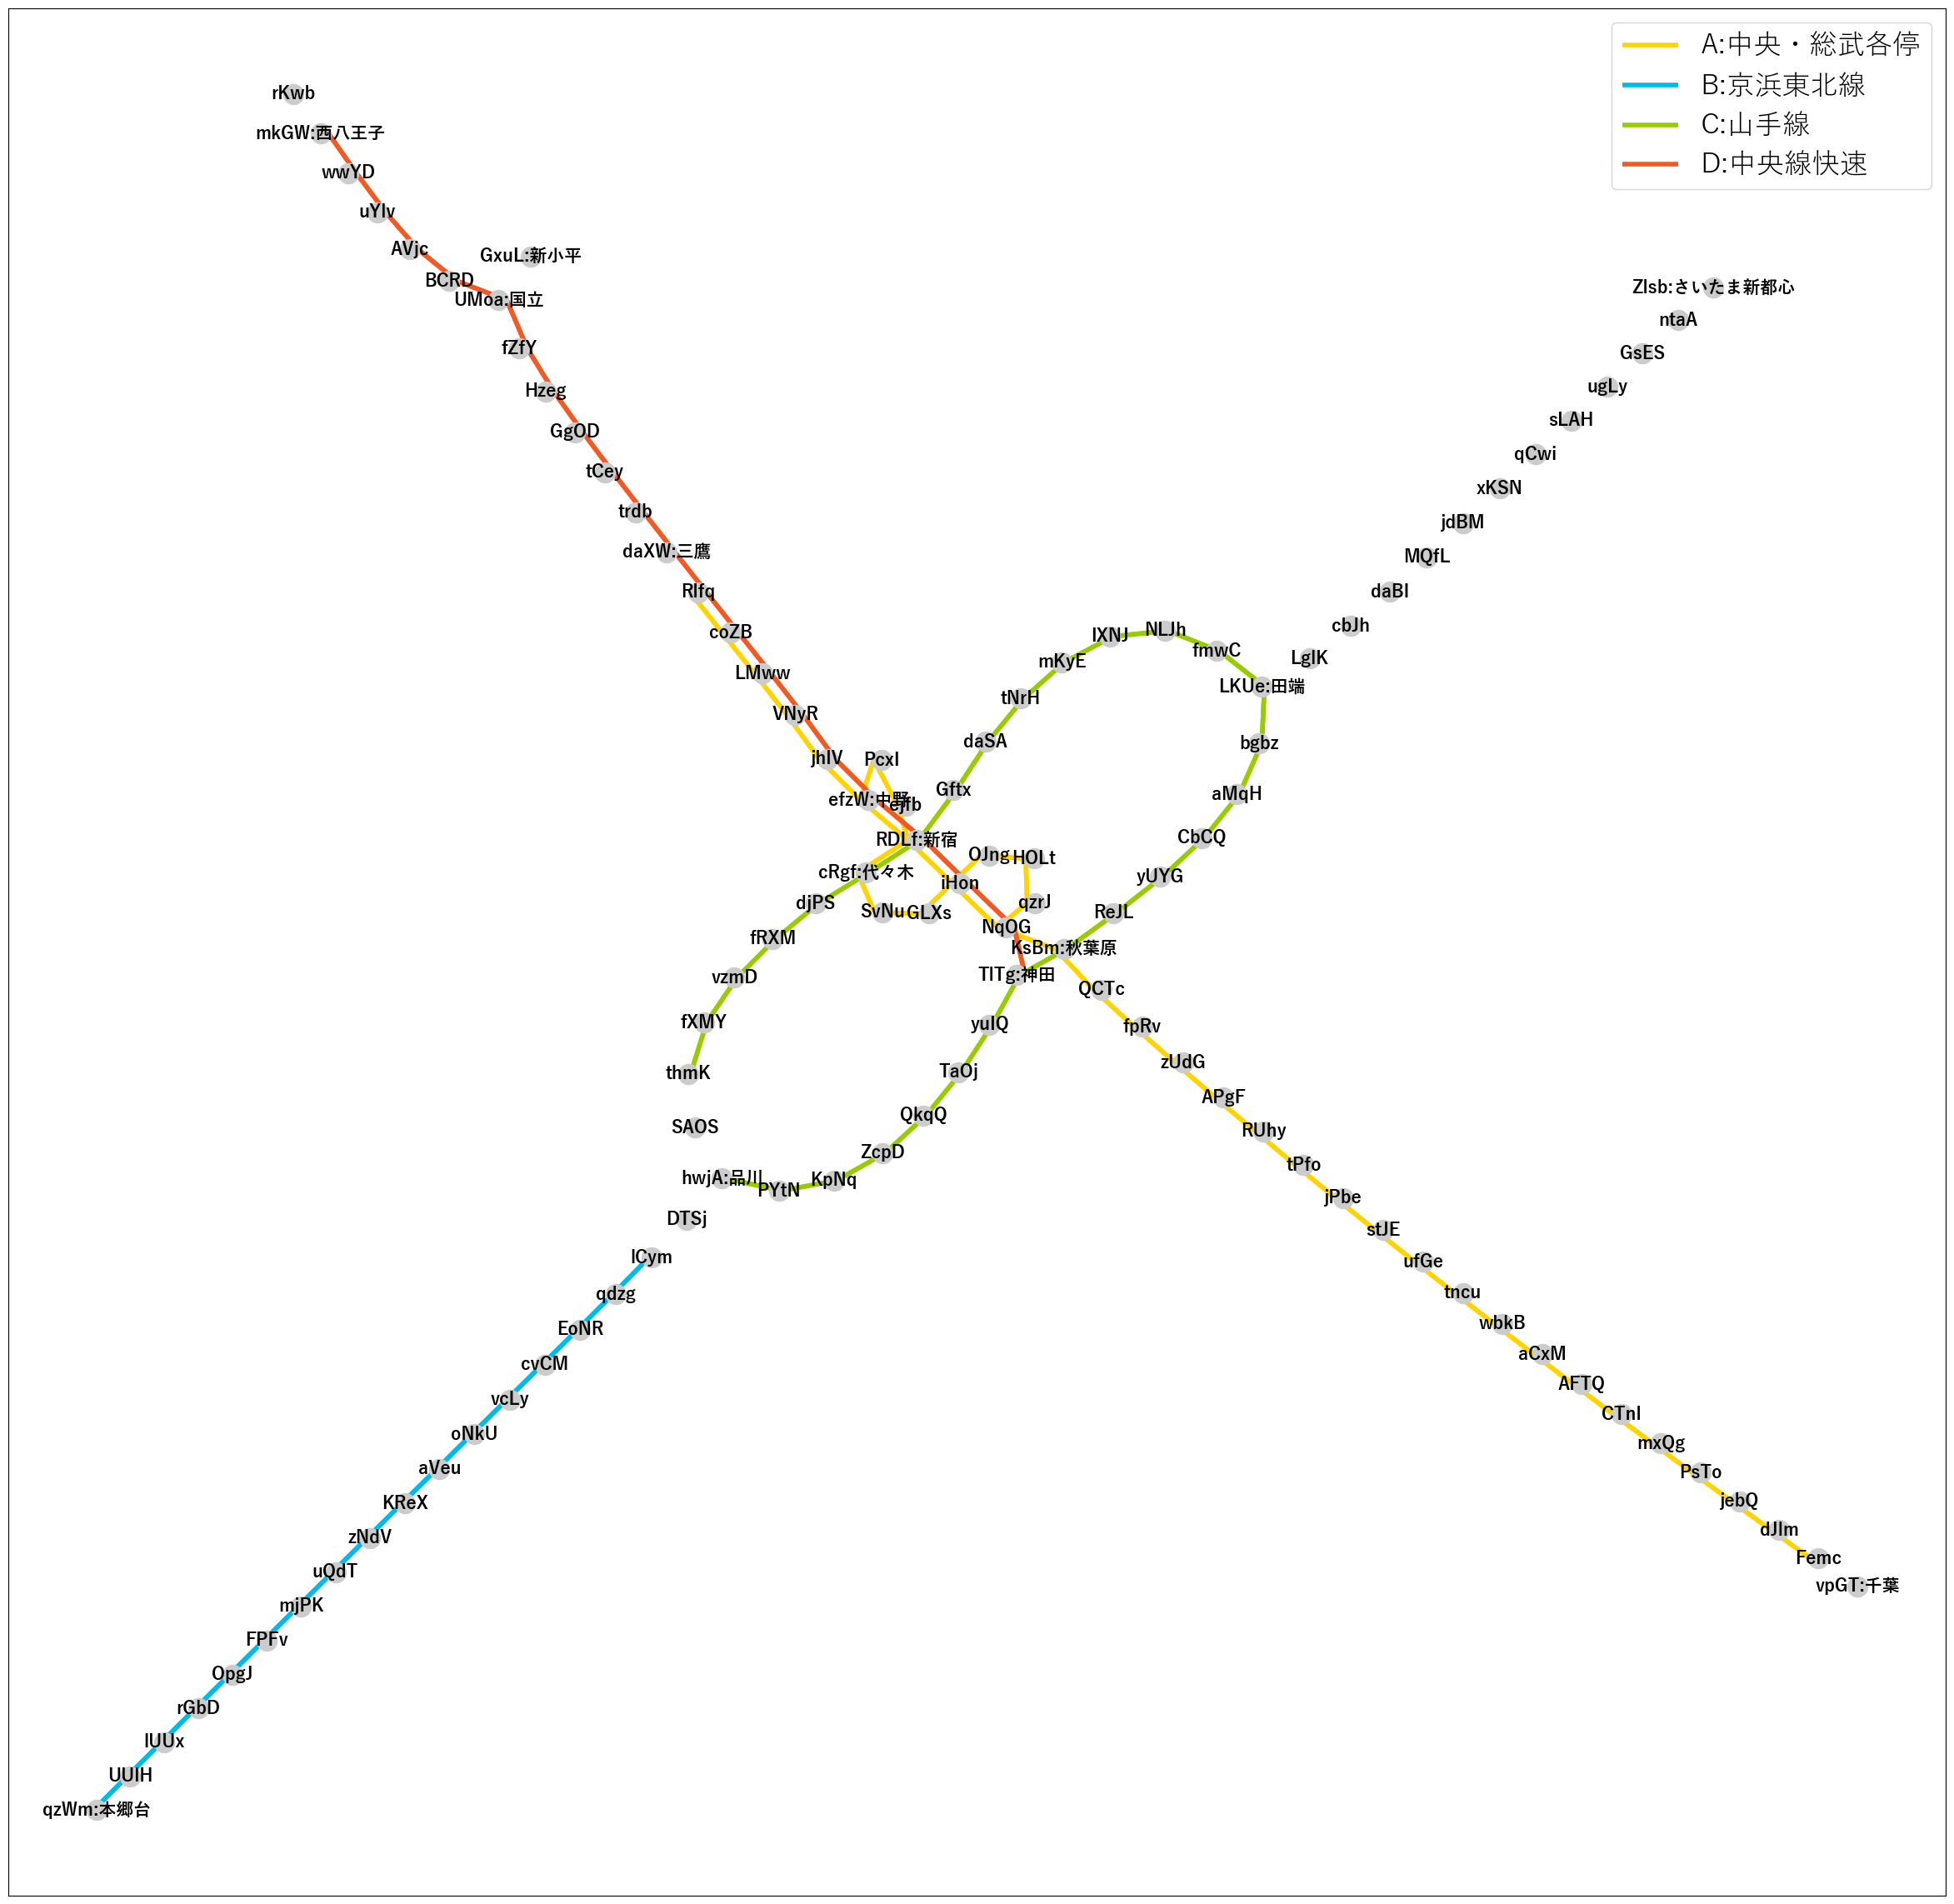

In [70]:
df_train=pd.read_csv('data/train.csv')
df_test=pd.read_csv('data/test.csv')
line_names_jp = ["中央・総武各停", "京浜東北線", "山手線", "中央線快速"]
colors = ["#ffd400", "#00bae8", "#99cc00", "#f15a22"]
station_dec = {
    "efzW": "中野",
    "KsBm": "秋葉原",
    "LKUe": "田端",
    "RDLf": "新宿",
    "cRgf": "代々木",
    "hwjA": "品川",
    "Zlsb": "さいたま新都心",
    "daXW": "三鷹",
    "vpGT": "千葉",
    "TlTg": "神田",
    "qzWm": "本郷台",
    "mkGW": "西八王子",
    "UMoa": "国立",
    "GxuL": "新小平",
}

plt.subplots(figsize=(30,30), dpi=100)
nx.draw_networkx_nodes(G, pos, node_color="#cccccc", alpha=1, node_size=300)  # ノードの描画
G_relabeled = nx.relabel_nodes(G, lambda x: f"{x}:{station_dec[x]}" if x in station_dec else x)
for k, v in station_dec.items():
    pos[f"{k}:{v}"] = pos[k]
nx.draw_networkx_labels(G_relabeled, pos, font_size=15, font_family="Yu Gothic", font_weight="bold")  # 駅名の描画
for i, (line_name, line_name_jp, color) in enumerate(zip("ABCD", line_names_jp, colors)):
    p = {k: [v[0]+(i-1.5)*0.006, v[1]] for k, v in pos.items()}  # 複数の路線が重なって描画されないように適当にずらす
    #g_all = G.subgraph(df_train[(df_train["lineName"]==line_name)]["stopStation"].unique())  # train 内で停車した駅での誘導部分グラフ
    #nx.draw_networkx_edges(g_all, p, alpha=1, edge_color=color, width=4, arrows=False, label=f"{line_name}:{line_name_jp}")  # 細線で描画
    g = G.subgraph(df_test[(df_test["lineName"]==line_name) & (df_test["target"]==1)]["stopStation"].unique())  # 予測対象の駅での誘導部分グラフ
    nx.draw_networkx_edges(g, p, alpha=1, edge_color=color, width=4, arrows=False, label=f"{line_name}:{line_name_jp}")  # 太線で描画
    
plt.legend(prop={"family": "Yu Gothic", "size": 24})
plt.show()

In [17]:
info=pd.read_csv('data/info.csv')

In [18]:
info

,info_id,date,time,lineName,directionCode1,directionCode2,all,station_from,station_to,cse
0,0,20191220,8:04,A,1,1,1,-,-,車両点検
1,1,20191220,8:09,A,1,1,1,-,-,車両点検
2,2,20191220,8:14,A,1,1,1,-,-,車両点検
3,3,20191220,8:16,A,1,1,1,-,-,車両点検
4,4,20191220,8:25,A,1,1,1,-,-,車両点検
...,...,...,...,...,...,...,...,...,...,...
1036,1036,20200324,18:41,D,1,1,1,-,-,人身事故
1037,1037,20200324,18:43,D,1,1,1,-,-,人身事故
1038,1038,20200324,18:54,D,1,0,1,-,-,人身事故
1039,1039,20200321,18:40,C,1,1,1,-,-,異音の確認


<AxesSubplot:>

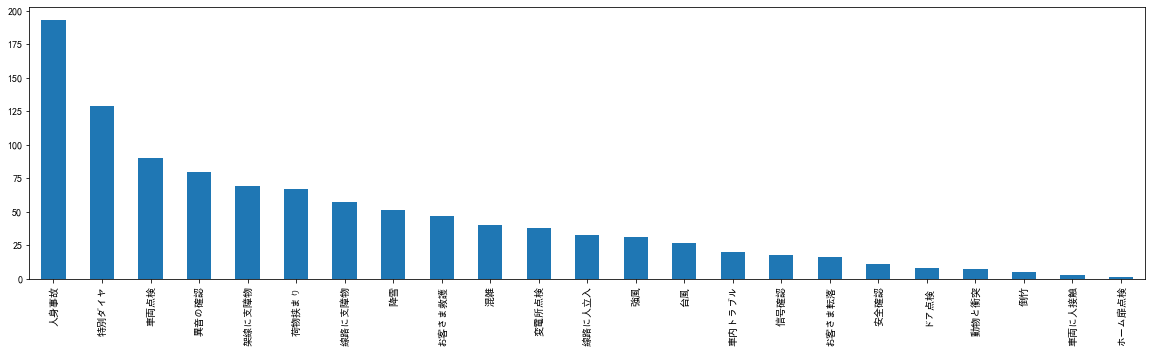

In [19]:
ax=plt.subplots(figsize=(20,5))
plt.rcParams['font.sans-serif']=['SimHei']
info.cse.value_counts().plot(kind='bar')

<AxesSubplot:>

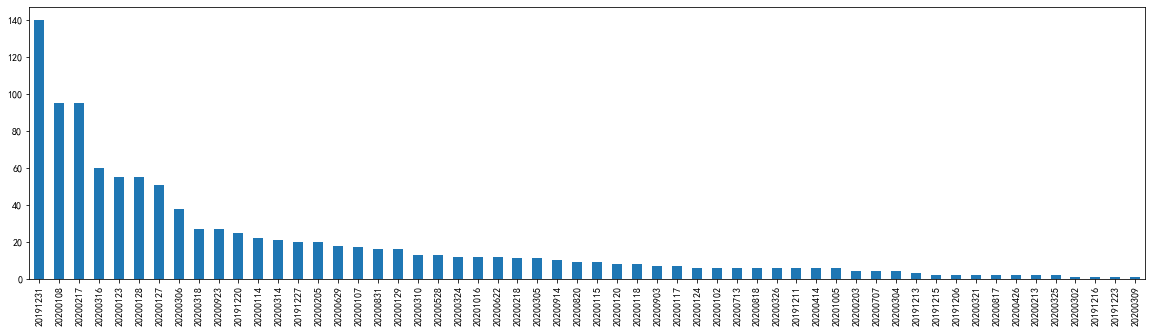

In [20]:
ax=plt.subplots(figsize=(20,5))
info.date.value_counts().plot(kind='bar')

In [21]:
sample_submit=pd.read_csv('data/sample_submit.csv')

In [22]:
sample_submit

,1488935,0.0
0,1488936,0.0
1,1488937,0.0
2,1488938,0.0
3,1488939,0.0
4,1488940,0.0
...,...,...
123269,2748010,0.0
123270,2748011,0.0
123271,2748012,0.0
123272,2748013,0.0
